# StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this project I will use multiple linear regression to investigate and predict the rent in Manhattan 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
streeteasy.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [65]:
# Training Set vs. Test Set
from sklearn.model_selection import train_test_split

x = streeteasy[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
                'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 
                'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = streeteasy[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [66]:
# Build a Linear Regression Model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Predicting y-values from x_test
y_predict = mlr.predict(x_test)

To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn \
This is a 1BR/1Bath apartment that is 620 ft² with a rent of $2000

In [67]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


Text(0.5, 1.0, 'Actual Rent vs Predicted Rent')

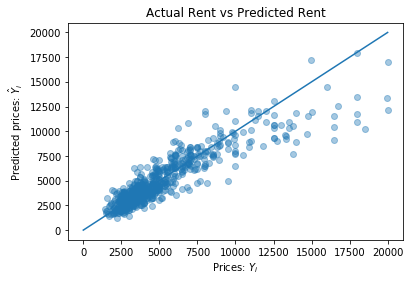

In [68]:
# Plotting the prices vs the predicted prices
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot(range(20000), range(20000))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

In [69]:
# Investigating coefficients
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

We can see that bathrooms impacts the price the most positively while bedrooms impacts it the most negatively. The least amount of impact is created by size (sqft, positively) and building age (years, negatively)

Text(0.5, 1.0, 'Relation between size and rent')

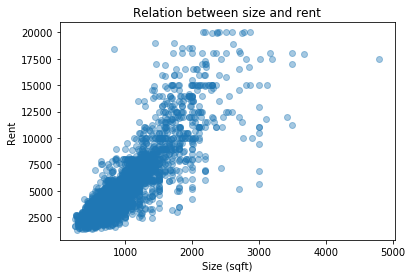

In [70]:
# Investigating correlations
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel("Size (sqft)")
plt.ylabel("Rent")
plt.title("Relation between size and rent")

Text(0.5, 1.0, 'Relation between subway distance and rent')

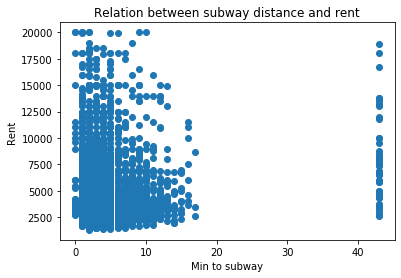

In [71]:
plt.scatter(df[['min_to_subway']], df[['rent']])
plt.xlabel("Min to subway")
plt.ylabel("Rent")
plt.title("Relation between subway distance and rent")

Text(0.5, 1.0, 'Residual Analysis')

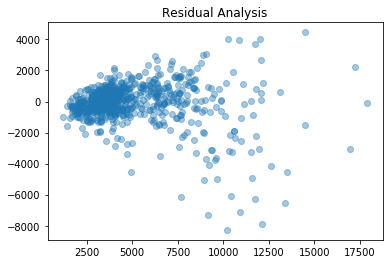

In [72]:
# Evaluating the Model's Accuracy
residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')


In [73]:
# Residual analysis
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7725460559817883
0.805037197535764


The R^2 is quite high, I tried adjusting the coeficients but this was the highest I could get. Overall I'm satisfied with the model